In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import f1_score

In [13]:
data = pd.read_csv("data/city.txt", header = None)
data

,0,1,2,3,4,5,6,7,8
0,北京,2959.19,730.79,749.41,513.34,467.87,1141.82,478.42,457.64
1,天津,2459.77,495.47,697.33,302.87,284.19,735.97,570.84,305.08
2,河北,1495.63,515.90,362.37,285.32,272.95,540.58,364.91,188.63
3,山西,1406.33,477.77,290.15,208.57,201.50,414.72,281.84,212.10
4,内蒙古,1303.97,524.29,254.83,192.17,249.81,463.09,287.87,192.96
5,辽宁,1730.84,553.90,246.91,279.81,239.18,445.20,330.24,163.86
6,吉林,1561.86,492.42,200.49,218.36,220.69,459.62,360.48,147.76
7,黑龙江,1410.11,510.71,211.88,277.11,224.65,376.82,317.61,152.85
8,上海,3712.31,550.74,893.37,346.93,527.00,1034.98,720.33,462.03
9,江苏,2207.58,449.37,572.40,211.92,302.09,585.23,429.77,252.54


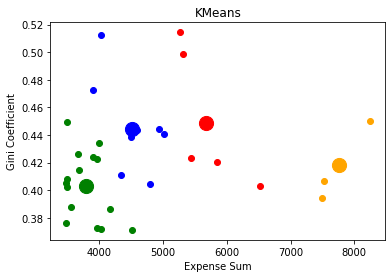

In [69]:
class_cnt = 4

X = data.iloc[:, 1:]
km = KMeans(n_clusters = class_cnt)
km.fit(X)
classes = km.labels_
centers = km.cluster_centers_
np.unique(classes)

exp_sum = np.sum(X, axis=1)
gini = X.iloc[:,0] / exp_sum

exp_cen = np.sum(centers, axis=1)
gini_cen = centers[:, 0] / exp_cen

colors = ['blue', 'orange', 'green', 'red']
for i in range(class_cnt):
  plt.scatter(exp_sum[classes == i], gini[classes == i], marker = 'o', c = colors[i])
  plt.scatter(exp_cen[i], gini_cen[i], marker='o', s=200, c = colors[i])
plt.title("KMeans")
plt.xlabel("Expense Sum")
plt.ylabel("Gini Coefficient")
plt.show()